<a href="https://colab.research.google.com/github/1234567-ichrak/1234567-ichrak/blob/main/stage_ichrak_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#import the dataset 
data = pd.read_csv('ichrak-new 1.csv', sep=",", decimal="," ) #sep = delimiter
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,sex,age,height,weight,QRS,QRS_duration,PR_interval,QT_interval,T_interval,heartrate,Attack
0,1,56,165,64,25,200,450,401,149,53,1
1,0,55,175,94,28,100,202,380,179,71,0
2,1,40,160,52,77,77,129,550,133,70,1
3,1,49,162,54,67,78,0,376,157,67,0
4,0,44,168,56,61,84,118,354,160,64,0


**DATA Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sex           378 non-null    int64
 1   age           378 non-null    int64
 2   height        378 non-null    int64
 3   weight        378 non-null    int64
 4   QRS           378 non-null    int64
 5   QRS_duration  378 non-null    int64
 6   PR_interval   378 non-null    int64
 7   QT_interval   378 non-null    int64
 8   T_interval    378 non-null    int64
 9   heartrate     378 non-null    int64
 10  Attack        378 non-null    int64
dtypes: int64(11)
memory usage: 32.6 KB


Info(): This method prints information about a DataFrame including the
index dtype and column dtypes, non-null values and memory usage.

In [ ]:
data.describe()

,sex,age,height,weight,QRS,QRS_duration,PR_interval,QT_interval,T_interval,heartrate,Attack
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,0.571429,47.140212,166.828042,68.891534,35.431217,93.193122,161.589947,347.177249,167.166667,85.074074,0.317460
std,0.495528,15.635738,40.115940,16.470257,46.237270,78.964971,112.192916,131.865005,35.446844,75.570262,0.466105
min,0.000000,0.000000,105.000000,6.000000,-172.000000,0.000000,0.000000,-50.000000,0.000000,10.000000,0.000000
25%,0.000000,36.000000,160.000000,60.000000,4.000000,78.250000,136.000000,340.000000,147.000000,66.000000,0.000000
50%,1.000000,47.000000,164.000000,68.500000,40.000000,84.500000,156.000000,364.000000,161.000000,74.500000,0.000000
75%,1.000000,58.000000,170.000000,80.000000,65.000000,93.000000,175.000000,383.000000,177.000000,84.000000,1.000000
max,1.000000,83.000000,780.000000,176.000000,360.000000,870.000000,900.000000,1000.000000,381.000000,780.000000,1.000000


The describe() method is used for calculating some statistical
data like percentile, mean and std of the numerical values of the
Series or DataFrame.

In [ ]:
missing_rate=data.isna().sum()
missing_rate 

sex             0
age             0
height          0
weight          0
QRS             0
QRS_duration    0
PR_interval     0
QT_interval     0
T_interval      0
heartrate       0
Attack          0
dtype: int64

In [ ]:
data.shape

(378, 11)

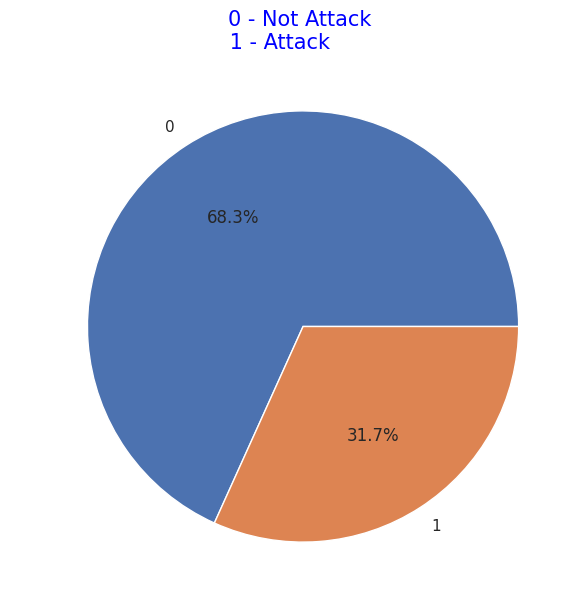

In [ ]:
y= data ['Attack']
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not Attack \n 1 - Attack        ', size=15, c='blue')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfad8bd110>,
      dtype=object)

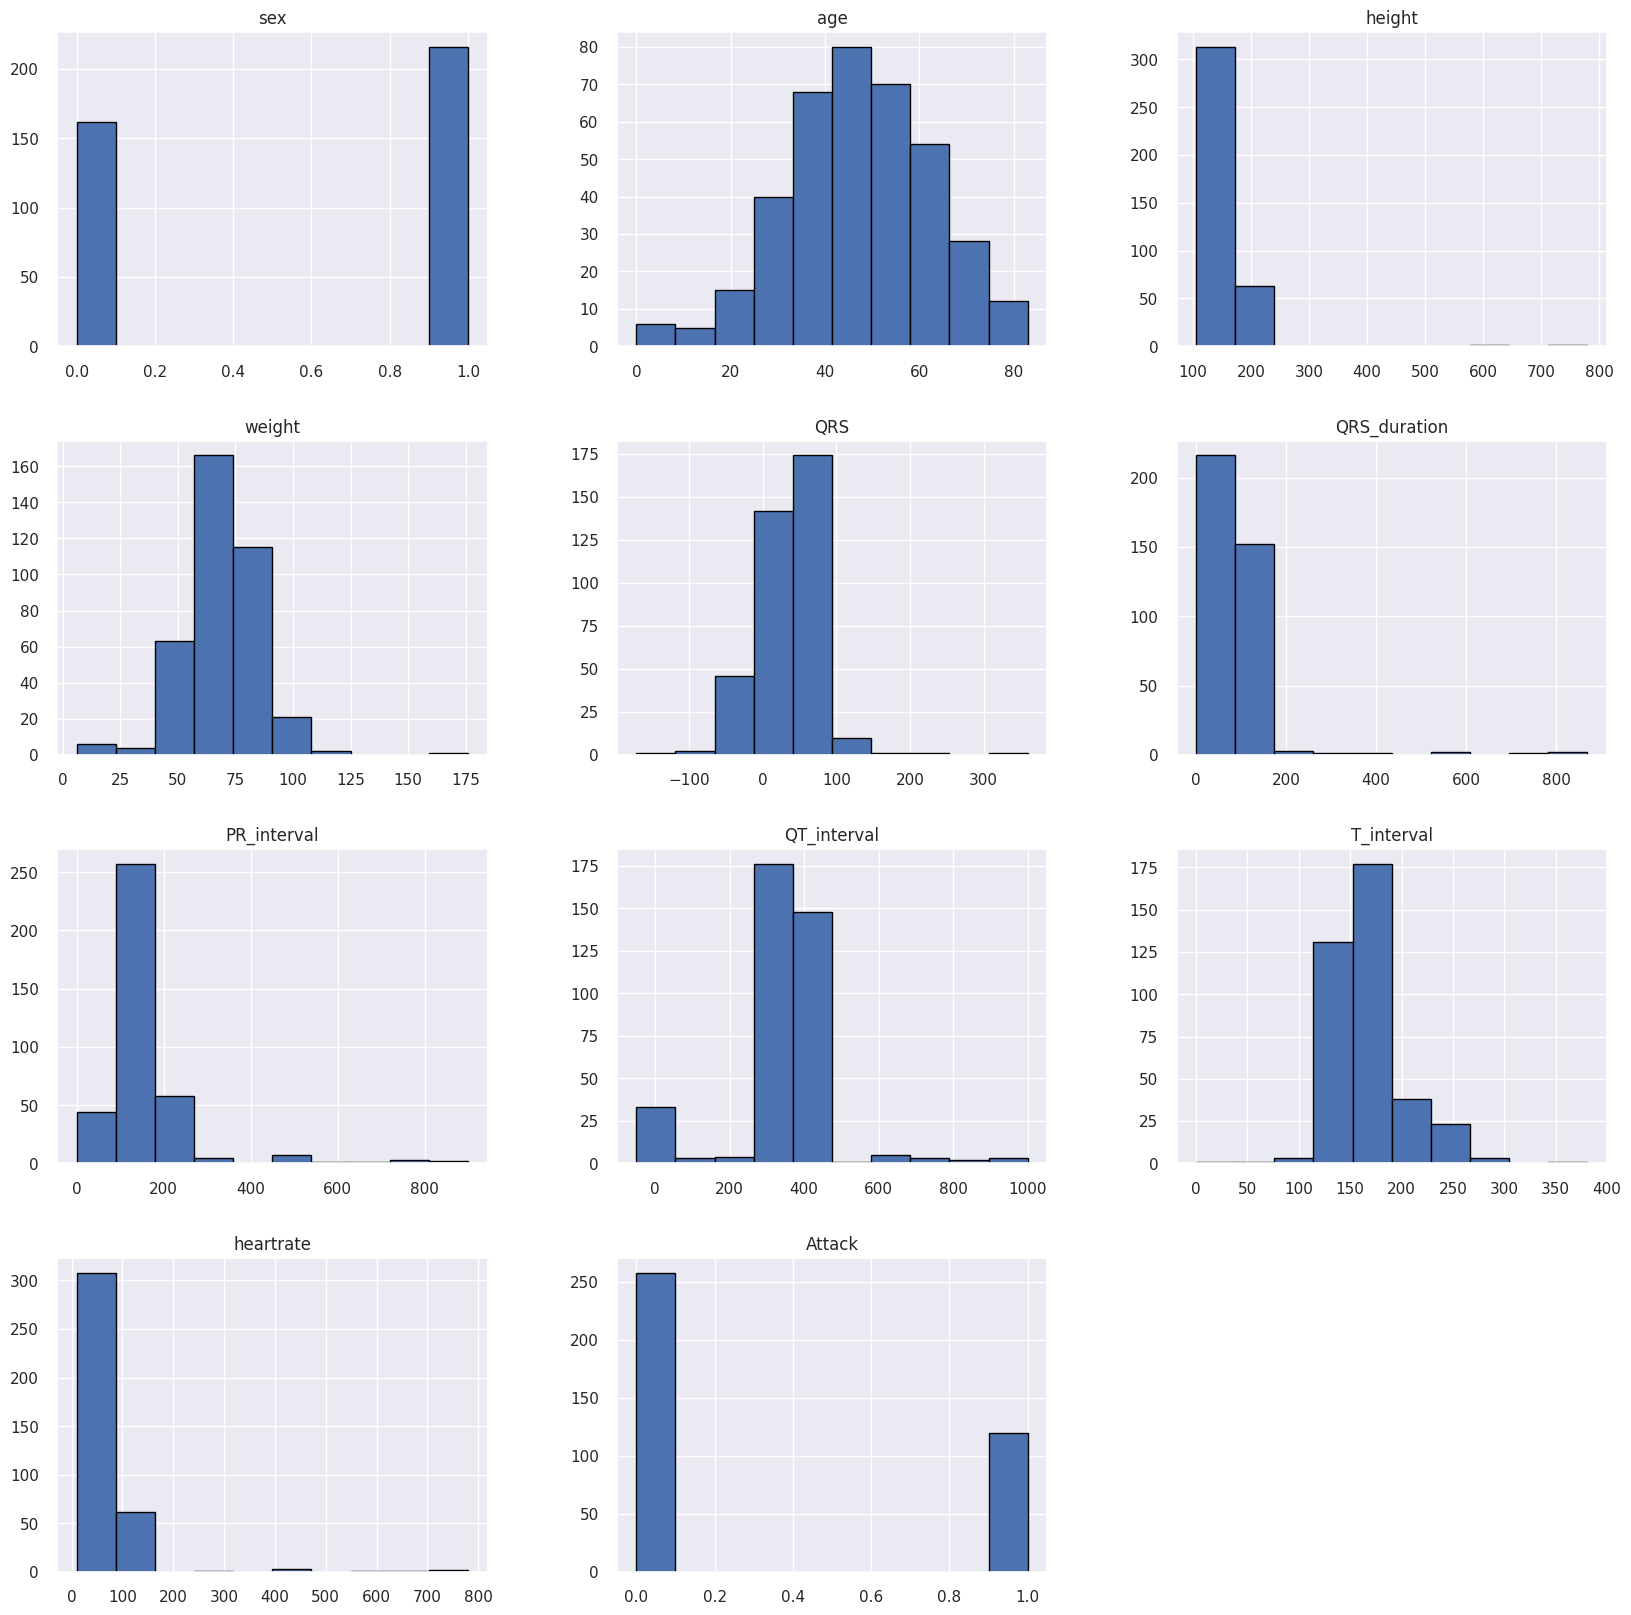

In [ ]:
# feature histograms
import seaborn as sns

data.hist(edgecolor='black', linewidth=1 , figsize=(20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

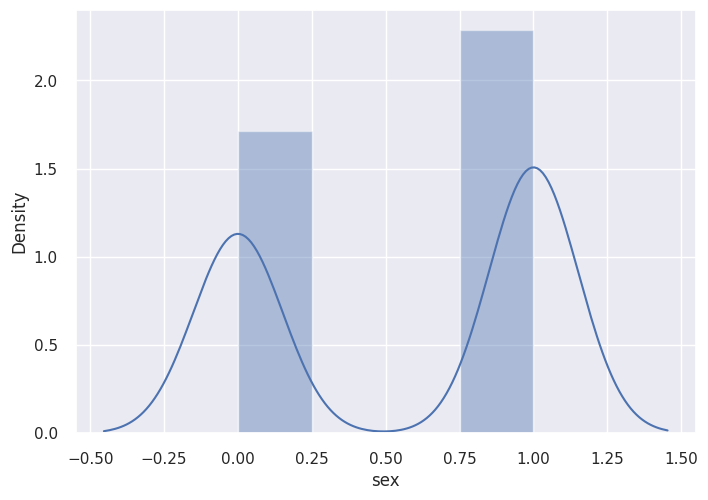

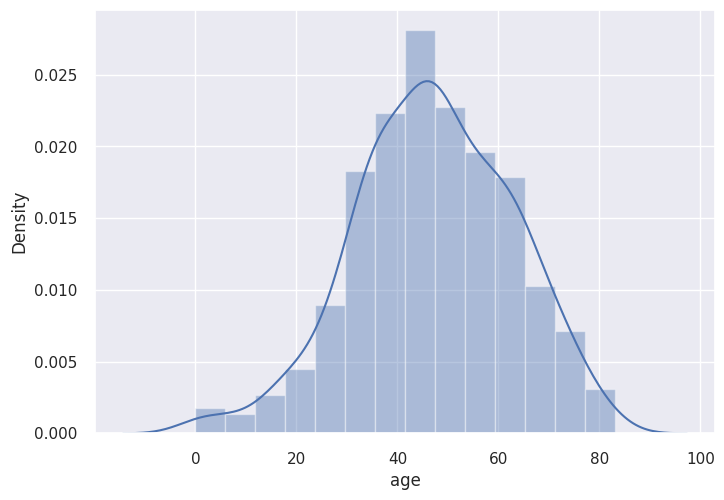

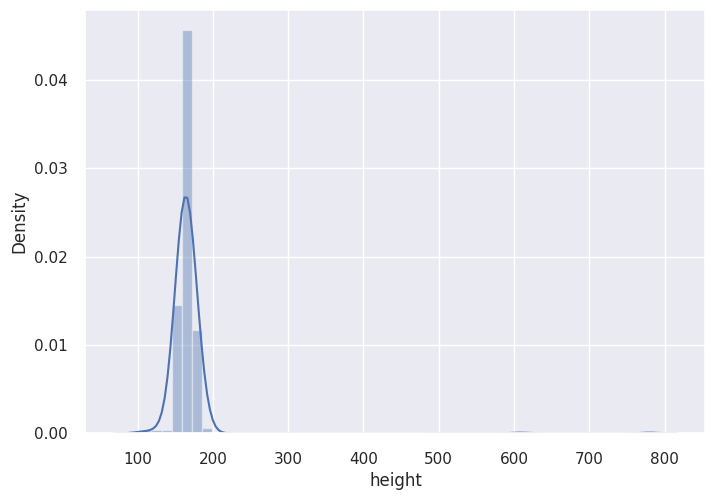

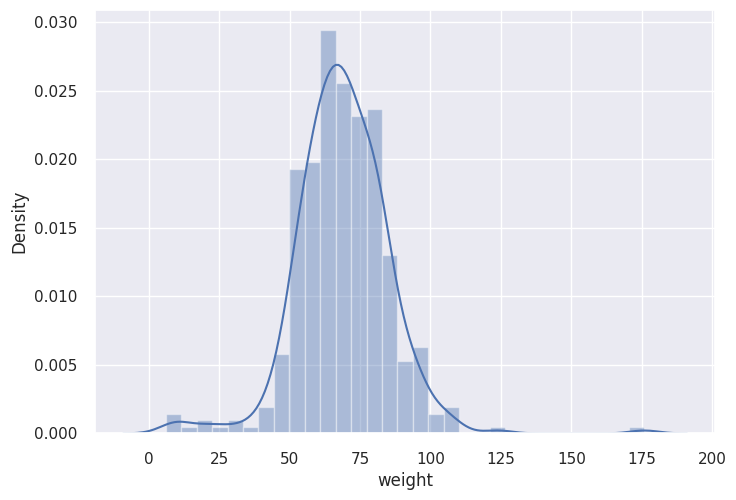

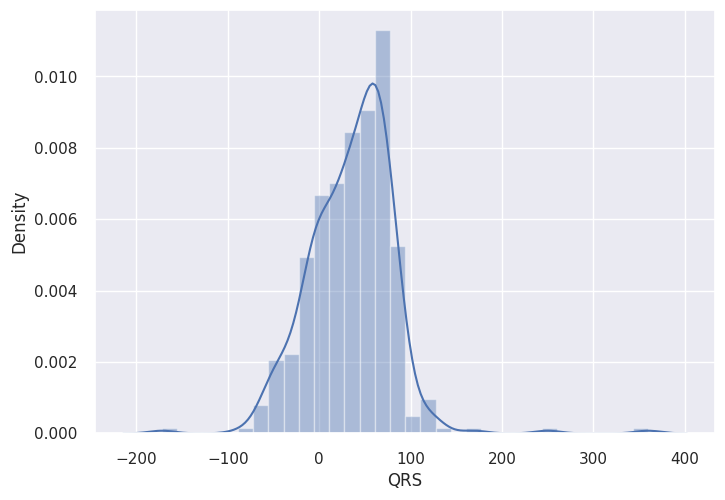

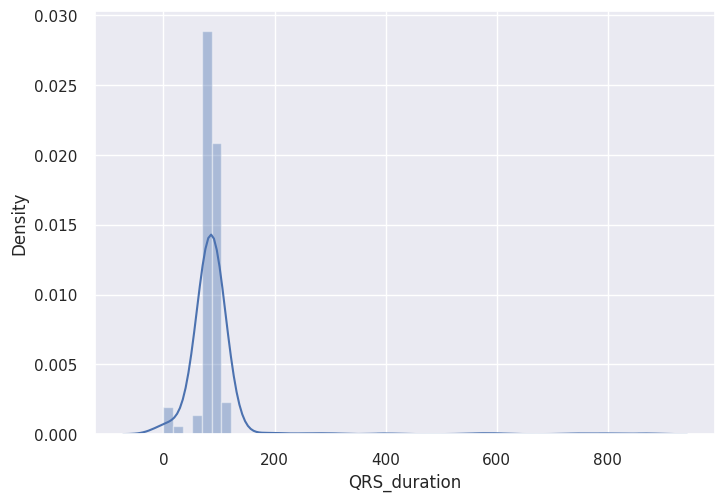

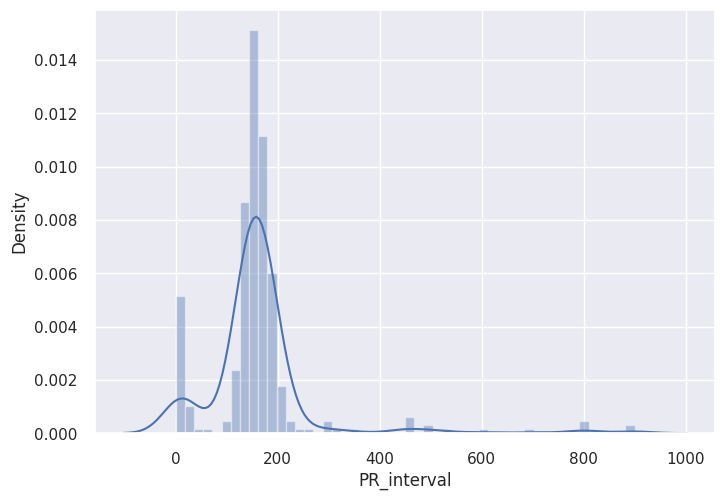

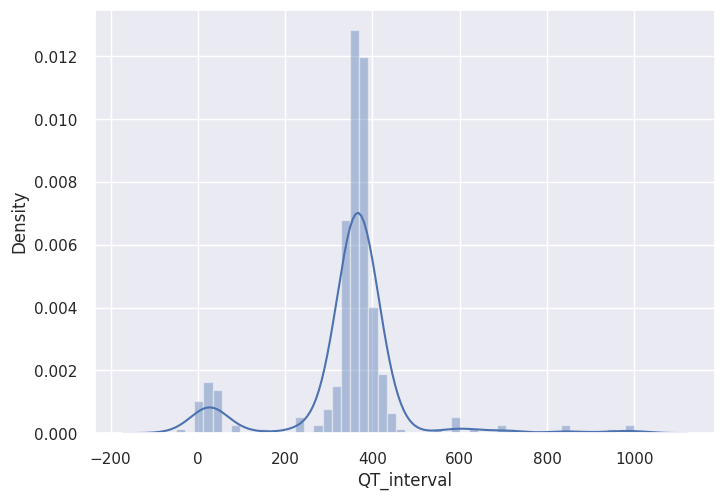

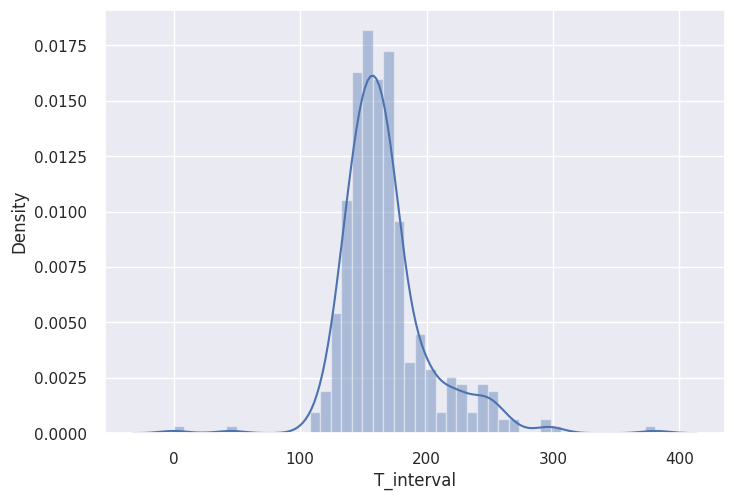

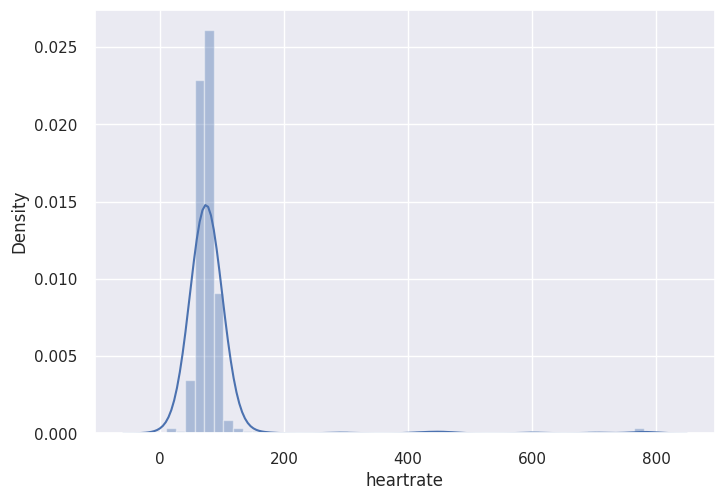

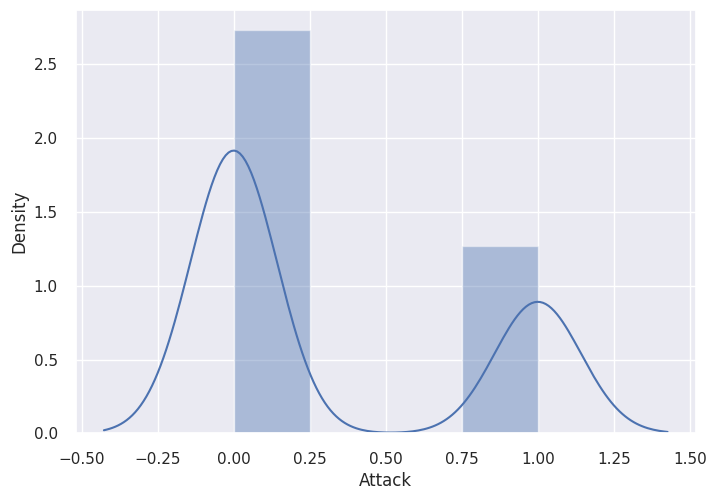

In [ ]:
for col in data.select_dtypes('int64'):
    plt.figure()
    sns.distplot(data[col])


In [ ]:
data['Attack'].value_counts()

0    258
1    120
Name: Attack, dtype: int64

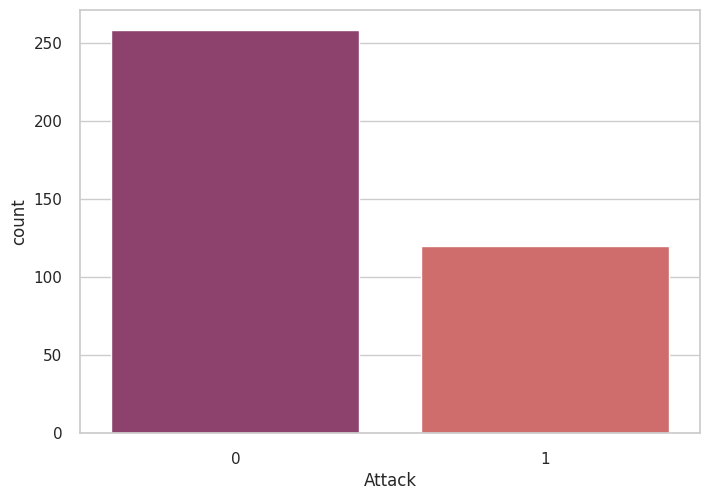

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Attack',data=data,palette='flare_r')

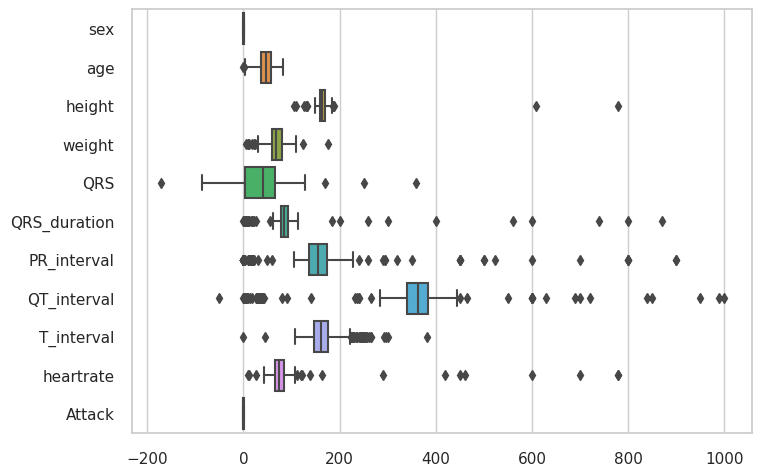

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
an=sns.boxplot(data=data,orient='h')

In [ ]:
# Data Preprocessing 
x= data.drop('Attack', axis=1)
y= data ['Attack']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

**KNN Algorithm**

In [ ]:
# Data Preprocessing 
from sklearn.model_selection import train_test_split
x= data.drop('Attack', axis=1)
y= data ['Attack']
x_train_Knn, x_test_Knn, y_train_Knn, y_test_Knn = train_test_split(x,y, test_size=0.20)

In [ ]:
#KNN 

#Feature scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train)

# x_train_Knn = scaler.transform(x_train_Knn)
# x_test_Knn = scaler.transform(x_test_Knn)


In [ ]:
#chossing KNN value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_Knn, y_train_Knn)
    pred_i = knn.predict(x_test_Knn)
    error.append(np.mean(pred_i != y_test_Knn))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#From the output we can see that the mean error is zero when the value of the K is between 0 and 5.
#the (n_neighbors=3)give us the smallest error

In [ ]:
#training the algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3)
classifier_knn.fit(x_train_Knn, y_train_Knn)

In [ ]:
#prediction
y_pred_KNN = classifier_knn.predict(x_test_Knn)
print (y_pred_KNN)

In [ ]:
#evalutate 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_Knn, y_pred_KNN))
print(classification_report(y_test_Knn, y_pred_KNN))


In [ ]:
#  confusion matrix 
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_Knn,y_pred_KNN)
import seaborn as sns
# Build the plot
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.RdPu, linewidths=1.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
#  accuracy
accuracy = metrics.accuracy_score(y_test_Knn,y_pred_KNN)
print(accuracy)
#  sensitivity
recall_sensitivity = metrics.recall_score(y_test_Knn, y_pred_KNN, pos_label=1)
print(recall_sensitivity)

Naive Bayes

In [ ]:
# Data Preprocessing 
x= data.drop('Attack', axis=1)
y= data ['Attack']
x_train_nai, x_test_nai, y_train_nai, y_test_nai = train_test_split(x,y, test_size=0.20)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_nai = sc.fit_transform(x_train_nai)
x_test_nai = sc.transform(x_test_nai)

In [ ]:
#Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier_nai = GaussianNB()
classifier_nai.fit(x_train_nai, y_train_nai)

In [ ]:
#prediction
y_pred_Naive  =  classifier_nai.predict(x_test_nai)
y_pred_Naive

In [ ]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_nai, y_pred_Naive))
print(classification_report(y_test_nai, y_pred_Naive))



In [ ]:
#  confusion matrix 
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_nai,y_pred_Naive)
import seaborn as sns
# Build the plot
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.RdPu, linewidths=1.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
#  accuracy
accuracy = metrics.accuracy_score(y_test_nai,y_pred_Naive)
print(accuracy)
#  sensitivity
recall_sensitivity = metrics.recall_score(y_test_nai, y_pred_Naive, pos_label=1)
print(recall_sensitivity)

Linear Regression

In [ ]:
# Data Preprocessing 
x= data.drop('Attack', axis=1)
y= data ['Attack']
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x,y, test_size=0.20)

In [ ]:
# Create a basic linear model
lr = LinearRegression()
lr_model = lr.fit(x_train_lr, y_train_lr)

In [ ]:
# Prediction
y_pred_lr= lr_model.predict(x_test_lr) 
y_pred_lr.round()

In [ ]:
#evaluate the model
print(classification_report(y_test_lr,y_pred_lr.round()))

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_lr,y_pred_lr.round())
import seaborn as sns
# Build the plot
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.RdPu, linewidths=1.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
  #accuracy
accuracy = metrics.accuracy_score(y_test_lr,y_pred_lr.round())
print(accuracy)
#  sensitivity
recall_sensitivity = metrics.recall_score(y_test_lr, y_pred_lr.round(), pos_label=1)
print(recall_sensitivity)

In [ ]:
#Decision Tree

In [ ]:
# Data Preprocessing 
x= data.drop('Attack', axis=1)
y= data ['Attack']
x_train_dtr, x_test_dtr, y_train_dtr, y_test_dtr = train_test_split(x,y, test_size=0.20)

In [ ]:
#DTR model
dtr = DecisionTreeRegressor()  
dtr_model = dtr.fit(x_train_dtr, y_train_dtr)

In [ ]:
#prediction
y_pred_dtr = dtr_model.predict(x_test_dtr) 
y_pred_dtr

In [ ]:
#Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test_dtr, y_pred_dtr.round()))

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_dtr,y_pred_dtr.round())
import seaborn as sns
# Build the plot
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.RdPu, linewidths=1.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')





In [ ]:
  #accuracy
accuracy = metrics.accuracy_score(y_test_dtr,y_pred_dtr.round())
print(accuracy)
#  sensitivity
recall_sensitivity = metrics.recall_score(y_test_dtr, y_pred_dtr.round(), pos_label=1)
print(recall_sensitivity)

Random Forest Model

In [ ]:
# Data Preprocessing 
x= data.drop('Attack', axis=1)
y= data ['Attack']
x_train_rfr, x_test_rfr, y_train_rfr, y_test_rfr = train_test_split(x,y, test_size=0.20)

In [ ]:
#RFR model
rfr = RandomForestRegressor()  
rfr_model = rfr.fit(x_train_rfr, y_train_rfr) 

In [ ]:
#Fit Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

In [ ]:
#prediction
y_pred_rfr = rfr_model.predict(x_test_rfr) 
y_pred_rfr.round()

In [ ]:
#evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test_rfr, y_pred_rfr.round()))


In [ ]:
#  confusion matrix 
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_rfr,y_pred_rfr.round())
import seaborn as sns
# Build the plot
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.RdPu, linewidths=1.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [ ]:
#  accuracy
accuracy = metrics.accuracy_score(y_test_rfr,y_pred_rfr.round())
print(accuracy)
#  sensitivity
recall_sensitivity = metrics.recall_score(y_test_rfr, y_pred_rfr.round(), pos_label=1)
print(recall_sensitivity)

Linear Discriminant Analysis 

In [ ]:
# Data Preprocessing 
x= data.drop('Attack', axis=1)
y= data ['Attack']
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(x,y, test_size=0.20)

In [ ]:
#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
x_train_lda = lda.fit_transform(x_train_lda, y_train_lda)
x_test_lda = lda.transform(x_test_lda)

#After applying LDA, now it’s time to apply any Classification algorithm. Here I am using Logistic Regression. But you can use any other classification algorithm and check the accuracy.

In [ ]:
#Fit Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lda = LogisticRegression(random_state = 0)
classifier_lda.fit(x_train_lda, y_train_lda)

In [ ]:
#Predict the Test set results
y_pred_LDa = classifier_lda.predict(x_test_lda)
y_pred_LDa

In [ ]:
#Check the accuracy 
print(confusion_matrix(y_test_lda, y_pred_LDa))
print(classification_report(y_test_lda, y_pred_LDa))


In [ ]:
#  confusion matrix 
#  confusion matrix 
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_lda,y_pred_LDa.round())
import seaborn as sns
# Build the plot
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.RdPu, linewidths=1.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')


In [ ]:
#  accuracy
accuracy = metrics.accuracy_score(y_test_lda,y_pred_LDa)
print(accuracy)
#  sensitivity
recall_sensitivity = metrics.recall_score(y_test_lda, y_pred_LDa, pos_label=1)
print(recall_sensitivity)

Neural Networks

In [ ]:
# Data Preprocessing 
x= data.drop('Attack', axis=1)
y= data ['Attack']
x_train_ann, x_test_ann, y_train_ann, y_test_ann = train_test_split(x,y, test_size=0.20)

In [ ]:
#training the model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(x_train_ann, y_train_ann.values.ravel())

In [ ]:
#prediction
predictions = mlp.predict(x_test_ann)
predictions

In [ ]:
#evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_ann,predictions))
print(classification_report(y_test_ann,predictions))

In [ ]:

#  confusion matrix 
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_ann,predictions.round())
import seaborn as sns
# Build the plot
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.RdPu, linewidths=1.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
#  accuracy
accuracy = metrics.accuracy_score(y_test_ann,predictions)
print(accuracy)
#  sensitivity
recall_sensitivity = metrics.recall_score(y_test_ann, predictions, pos_label=1)
print(recall_sensitivity)

Support Vector Machine

In [ ]:
# Data Preprocessing 
x= data.drop('Attack', axis=1)
y= data ['Attack']

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x,y, test_size=0.20)

In [ ]:
# Training the algorithm
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train_svm, y_train_svm)

In [ ]:
# predecting 
y_pred_svm = svclassifier.predict(x_test_svm)
print(y_pred_svm)

In [ ]:
# evaluation model 
print(classification_report(y_test_svm,y_pred_svm))

In [ ]:
#  confusion matrix 
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_svm,y_pred_svm.round())
import seaborn as sns
# Build the plot
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.RdPu, linewidths=1.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
#  accuracy
accuracy = metrics.accuracy_score(y_test_svm,y_pred_svm)
print(accuracy)
#  sensitivity
recall_sensitivity = metrics.recall_score(y_test_svm, y_pred_svm, pos_label=1)
print(recall_sensitivity)